In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median, StatisticsError

In [2]:
table = pd.read_excel('12.21 (ежегодная инвент.).xlsx')

# Общая оценка

Размеры датасета

In [3]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,NaN,NaN,NaN,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,NaN,NaN,NaN,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,NaN,NaN,NaN,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,NaN,NaN,NaN,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,NaN,NaN,NaN,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [4]:
print(table.shape)
print(len(table))

(43081, 8)
43081


Уникальные значения в столбцах

In [5]:
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].fillna('нет')
table['Ввод_данных'] = table['Ввод_данных'].fillna('нет')
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].fillna('нет')
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,нет,нет,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [6]:
table['Переход_по_ссылке'].unique()

array(['нет', 'Совершён'], dtype=object)

In [7]:
table['Ввод_данных'].unique()

array(['нет', 'Введены'], dtype=object)

In [8]:
table['Сообщение_в_ЦПКБ'].unique()

array(['нет', 'Сообщил'], dtype=object)

Заменяем длинные сообщения на численные эквиваленты

In [9]:
def change_data(msg: str) -> str:
    return 1 if msg.split()[0] in ['Совершён', 'Сообщил', 'Введены', 'Поступило'] else 0

In [10]:
table['Ввод_данных'] = table['Ввод_данных'].map(change_data)
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,нет,0,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,0,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,0,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


Проверяем результат

In [11]:
table['Ввод_данных'].unique()

array([0, 1])

In [12]:
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].map(change_data)
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].map(change_data)

Корректируем названия блоков, убираем лишнии символы

In [13]:
def change_dep(dep: str) -> str:
    dep_temp = dep.split()
    return dep_temp[0] + " " + dep_temp[1].strip("\"")

In [14]:
table['Подразделение_3'] = table['Подразделение_3'].map(change_dep)

In [15]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,0,0,0,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),Блок Технологии,1.0
1,2,0,0,0,Руководитель направления,ПАО Сбербанк (ЦА),Блок Технологии,1.0
2,3,0,0,0,Руководитель направления,ПАО Сбербанк (ЦА),Блок Риски,2.0
3,4,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,3.0
4,5,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,4.0


Подсчет сотрудников

In [16]:
table.value_counts('Должность')

Должность
Руководитель направления                                                            8169
Главный инженер по разработке                                                       6046
Ведущий инженер по разработке                                                       3007
Эксперт                                                                             2891
Менеджер                                                                            2455
                                                                                    ... 
Исполнительный директор-директор по управлению ликвидностью на глобальных рынках       1
Исполнительный директор-директор по торговым операциям                                 1
Старший управляющий директор, руководитель облачной стратегии и трансформации       1
Исполнительный директор-директор по продажам производных инструментов                  1
Руководитель направления по взаимодействию с регуляторами                              1
Length: 377

In [17]:
len(table.value_counts('Должность'))

377

Подсчет блоков

In [18]:
table.value_counts('Подразделение_3')

Подразделение_3
Блок Технологии                     27041
Блок Корпоративно-инвестиционный     3893
Блок Розничный                       2434
Блок Сервисы                         1950
Подразделения вне                    1296
Блок Управление                      1287
Блок HR                               979
Блок Риски                            910
Блок Финансы                          898
Блок Сеть                             773
Другие подразделения                  731
Блок GR,                              680
Блок Стратегия                        137
Блок Sberbank                          72
dtype: int64

In [19]:
len(table.value_counts('Подразделение_3'))

14

# Рассмотрение всех исходов

Класс для того, чтобы сохранить описание каждого конкретного варианта. Можно расширить и добавить дополнительные критерии для оценки. Worker_rate - топ сотрудников, deaprtment_rate - топ блоков, percentw_rate и percentd_rate - топы переведенные в проценты

In [20]:
class EndDescribe:
    def __init__(self):
        self.num = 0
        self.table_len = 0
        self.worker_rate = []
        self.department_rate = []
        self.percentw_rate = []
        self.percentd_rate = []
        
    def get_percent(self, rate_list: dict) -> dict:
        cur_len = sum(rate_list.values())
        percent_val = list(map(lambda item: float("{0:.3f}".format((item / cur_len) * 100)), rate_list.values()))
        return {key: val for key, val in zip(rate_list.keys(), percent_val)}
        
        

Функция проверки и заполнения каждого из возможных исходов. При расширении класса, необходимо добавить сюда вычисления добавленных характеристик. Возвращает объект типа EndDescribe для полученного на вход исхода

In [21]:
def check_end(cur_end: tuple) -> EndDescribe:
    cur_table = table.query(f'Переход_по_ссылке == {cur_end[0]} & Ввод_данных == {cur_end[1]} & Сообщение_в_ЦПКБ == {cur_end[2]}')
    cur_dscrb = EndDescribe()
    cur_dscrb.table_len = len(cur_table)
    cur_dscrb.worker_rate = cur_table.value_counts('Должность')
    cur_dscrb.department_rate = cur_table.value_counts('Подразделение_3')
    cur_dscrb.percentw_rate = cur_dscrb.get_percent(dict(cur_dscrb.worker_rate.items()))
    cur_dscrb.percentd_rate = cur_dscrb.get_percent(dict(cur_dscrb.department_rate.items()))
    
    return cur_dscrb

Множество всех исходов, 1 - есть 0 - нет. Каждый вектор обозначает один из возможных исходов. То есть, например, вектор (0, 0, 0) - обозначает полное игнорирование письма, а вектор (1, 0, 0) - означает только переход по ссылке. 

In [22]:
codes = [(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Список объектов с описаниями всех возможных исходов

In [23]:
possible_ends = {code: check_end(code) for code in codes}

Общее распределение всех исходов

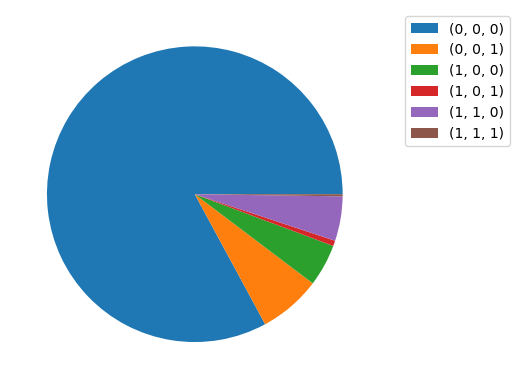

In [24]:
gen_len = len(table)

plt.pie([(end.table_len / gen_len) * 100 for end in possible_ends.values()])

plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Топ 10 сотрудников по численности

In [25]:
top_workers = table.value_counts('Должность')[:10]
top_workers

Должность
Руководитель направления            8169
Главный инженер по разработке       6046
Ведущий инженер по разработке       3007
Эксперт                             2891
Менеджер                            2455
Исполнительный директор             2054
Старший инженер по разработке       1691
Руководитель проектов               1268
Аналитик                            1022
Ведущий инженер по сопровождению     924
dtype: int64

Топ 10 популярных должностей - 70% от общего количества

In [26]:
float("{0:.3f}".format((sum(top_workers.values)/sum(table.value_counts('Должность'))) * 100))

68.538

Топ 10 должностей в каждом варианте

In [27]:
worker_rate = {key: val.worker_rate[:10] for key, val in possible_ends.items()}
for key, val in worker_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Должность
Руководитель направления            6537
Главный инженер по разработке       4979
Эксперт                             2542
Ведущий инженер по разработке       2509
Менеджер                            2084
Исполнительный директор             1607
Старший инженер по разработке       1373
Руководитель проектов               1069
Аналитик                             864
Ведущий инженер по сопровождению     804
dtype: int64


(0, 0, 1): 
Должность
Руководитель направления          767
Главный инженер по разработке     419
Исполнительный директор           216
Ведущий инженер по разработке     168
Менеджер                          130
Эксперт                           104
Старший инженер по разработке      96
Руководитель проектов              71
Главный специалист                 60
Старший эксперт по технологиям     56
dtype: int64


(1, 0, 0): 
Должность
Руководитель направления         378
Главный инженер по разработке    300
Ведущий инженер по разработке    139
Исп

Распределение по исходам для топ 10 должностей на графиках

Руководитель направления


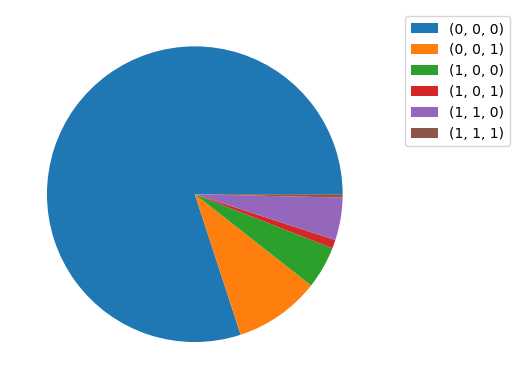

Главный инженер по разработке


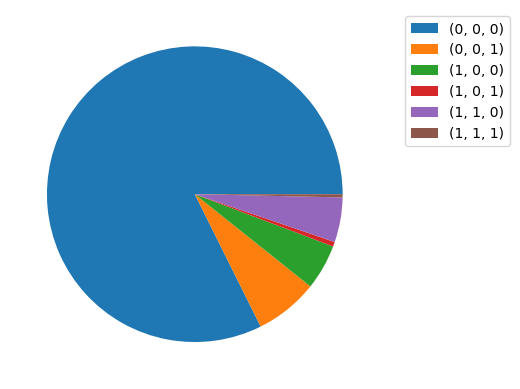

Ведущий инженер по разработке


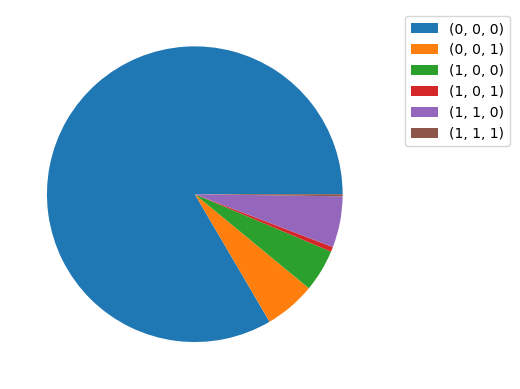

Эксперт


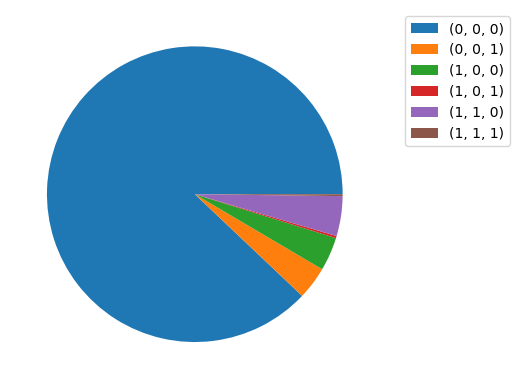

Менеджер


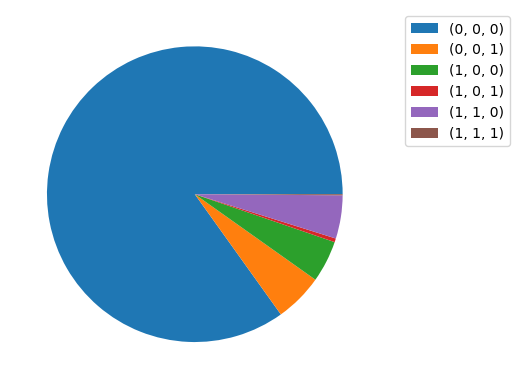

Исполнительный директор


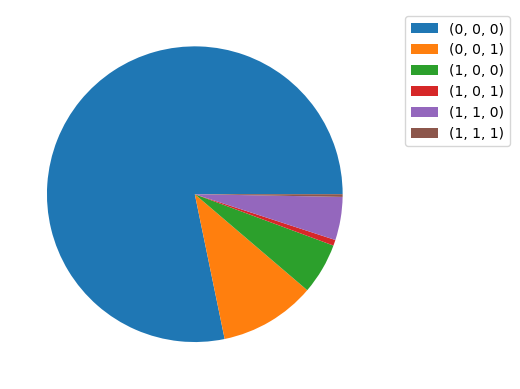

Старший инженер по разработке


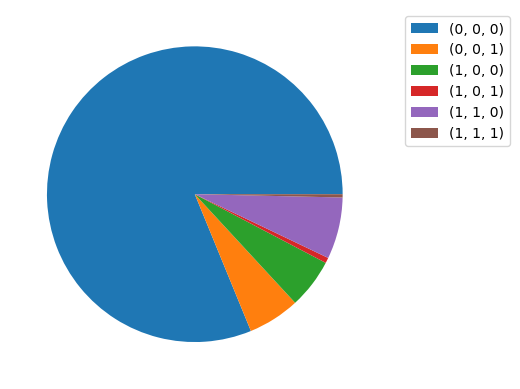

Руководитель проектов


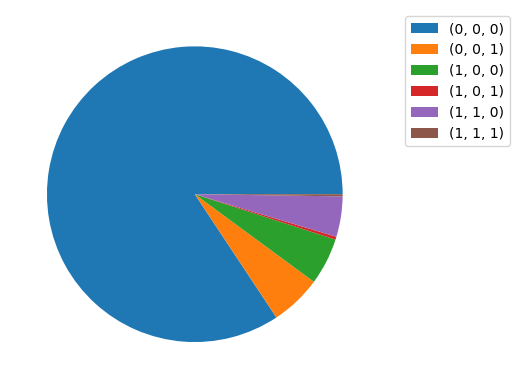

Аналитик


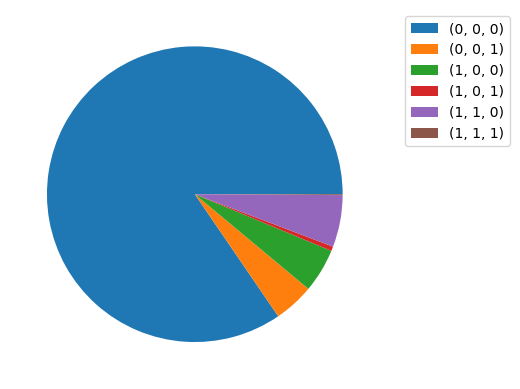

Ведущий инженер по сопровождению


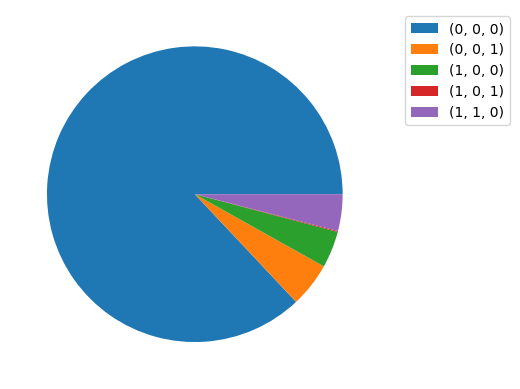

In [28]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Топ 10 блоков по численности

In [29]:
top_departments = table.value_counts('Подразделение_3')[:10]
top_departments

Подразделение_3
Блок Технологии                     27041
Блок Корпоративно-инвестиционный     3893
Блок Розничный                       2434
Блок Сервисы                         1950
Подразделения вне                    1296
Блок Управление                      1287
Блок HR                               979
Блок Риски                            910
Блок Финансы                          898
Блок Сеть                             773
dtype: int64

Топ 10 блоков в каждом варианте

In [30]:
department_rate = {key: val.department_rate[:10] for key, val in possible_ends.items()}
for key, val in department_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Подразделение_3
Блок Технологии                     22239
Блок Корпоративно-инвестиционный     3341
Блок Розничный                       2094
Блок Сервисы                         1604
Блок Управление                      1177
Подразделения вне                    1082
Блок HR                               817
Блок Финансы                          776
Блок Сеть                             667
Другие подразделения                  641
dtype: int64


(0, 0, 1): 
Подразделение_3
Блок Технологии                     1920
Блок Риски                           318
Блок Корпоративно-инвестиционный     166
Блок Сервисы                         139
Блок Розничный                        92
Подразделения вне                     65
Блок GR,                              46
Блок HR                               44
Блок Сеть                             38
Другие подразделения                  31
dtype: int64


(1, 0, 0): 
Подразделение_3
Блок Технологии                     1301
Блок Корпоратив

Распределение исходов для топ 10 блоков на графиках

Блок Технологии


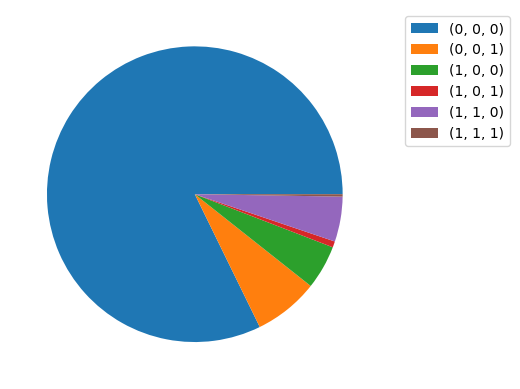

Блок Корпоративно-инвестиционный


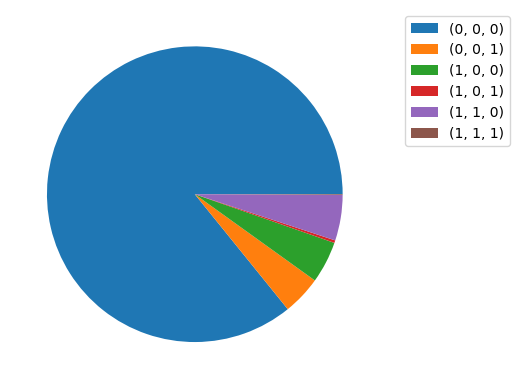

Блок Розничный


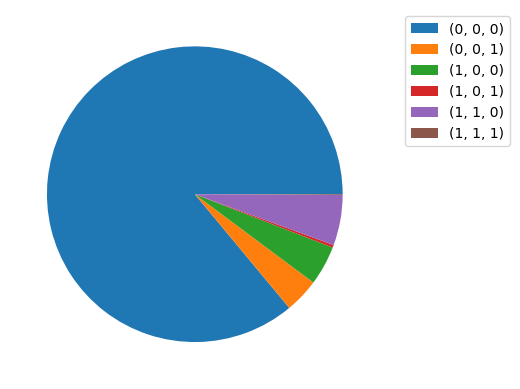

Блок Сервисы


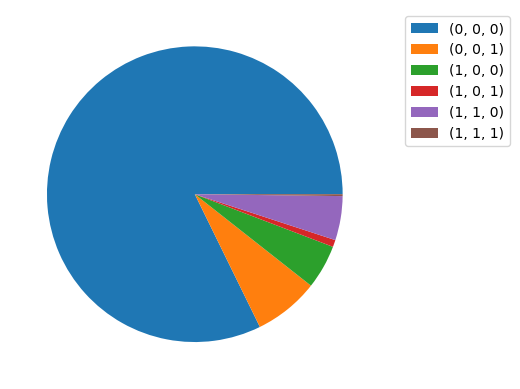

Подразделения вне


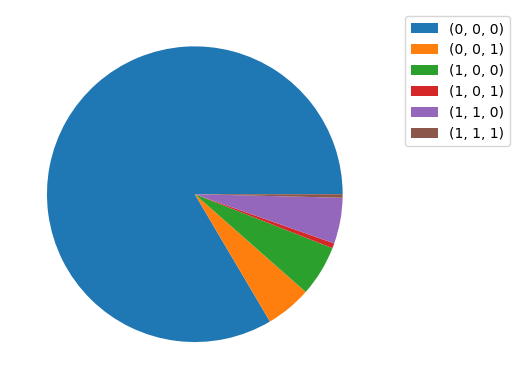

Блок Управление


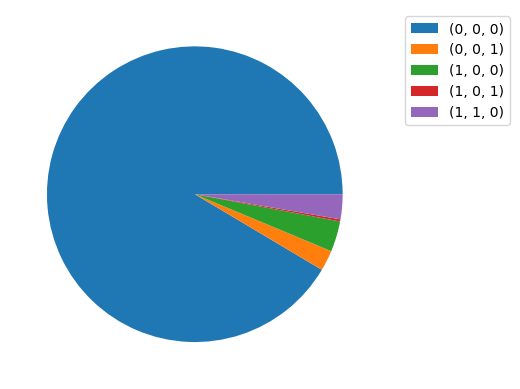

Блок HR


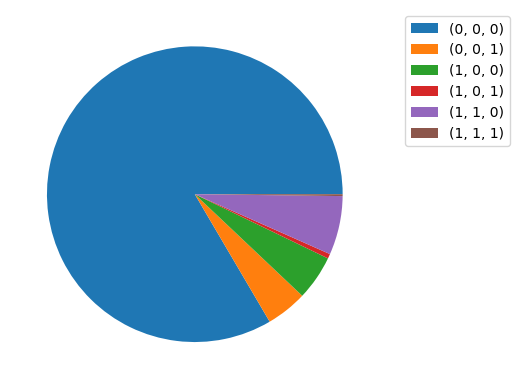

Блок Риски


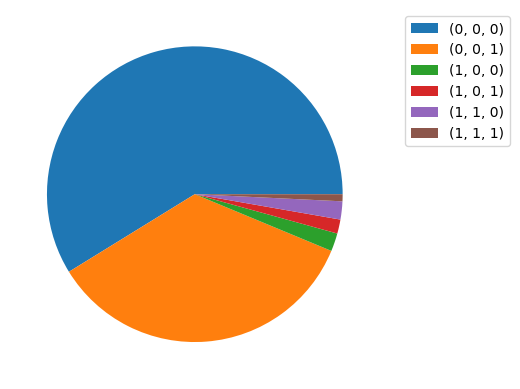

Блок Финансы


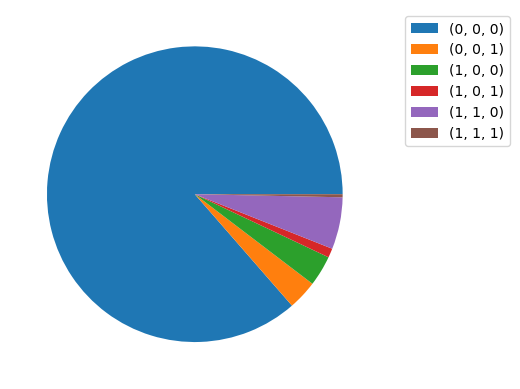

Блок Сеть


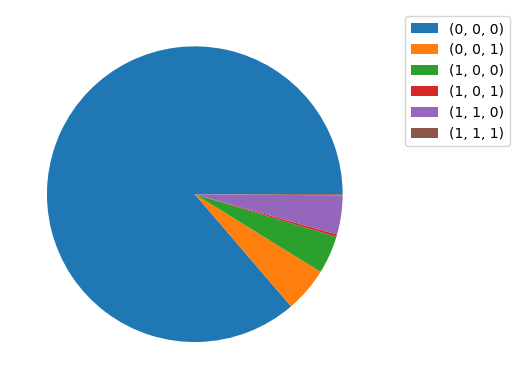

In [31]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Сравненеи размера каждого исхода с общим размером

In [32]:
fit_workers = [(end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [33]:
other_workers = [100 - (end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [34]:
indexes = [str(key) for key in possible_ends.keys()]
results = {"end": indexes, "Fit": fit_workers, "Other": other_workers}

df = pd.DataFrame(results, index=indexes)

In [35]:
df

,end,Fit,Other
"(0, 0, 0)","(0, 0, 0)",82.892691,17.107309
"(0, 0, 1)","(0, 0, 1)",6.805784,93.194216
"(1, 0, 0)","(1, 0, 0)",4.607600,95.392400
"(1, 0, 1)","(1, 0, 1)",0.594229,99.405771
"(1, 1, 0)","(1, 1, 0)",4.865254,95.134746
"(1, 1, 1)","(1, 1, 1)",0.234442,99.765558


Соотношение объема каждого исхода к общему объему на графике

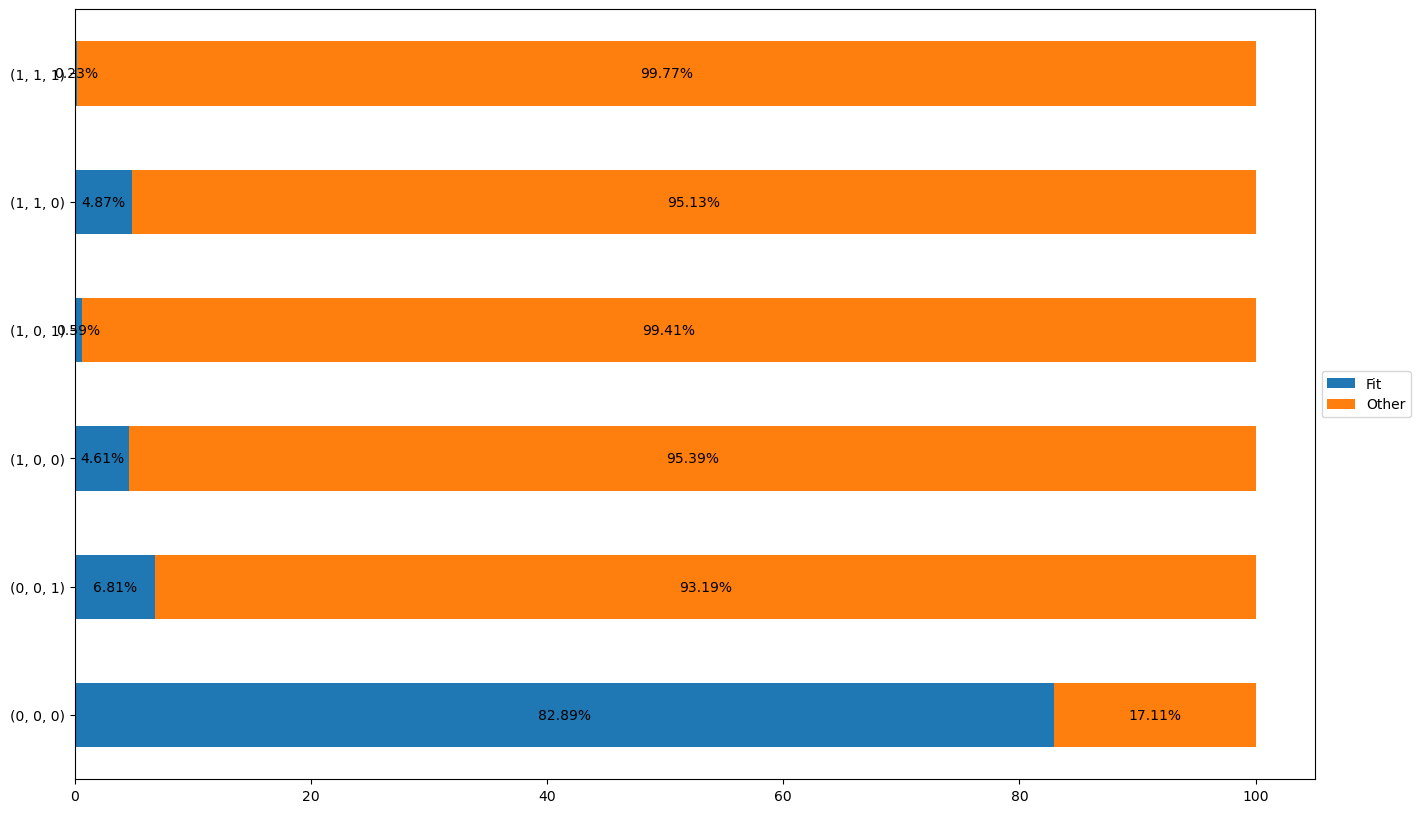

In [36]:
ax = df.plot.barh(stacked=True, figsize=(16, 10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')

Создание таблиц для более удобной обработки исходов

Таблица для топ 10 по популярности должностей

In [37]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = list(dict(top_workers).keys())
temp_table = temp_table.loc[temp_table['Должность'].isin(top_work)]

Полная таблица для всех должностей

In [38]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
full_temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = table['Должность'].unique()
full_temp_table = full_temp_table.loc[full_temp_table['Должность'].isin(top_work)]

In [39]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
43076,Инженер по разработке,Блок Технологии,"(0, 0, 0)"
43077,Аналитик,Подразделения вне,"(1, 0, 0)"
43078,Эксперт,Блок Стратегия,"(0, 0, 0)"
43079,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [40]:
full_temp_table['Исход'] = full_temp_table['Исход'].map(lambda cell: str(cell))

Распределение по исходам для топ 10 по популярности должностей в каждом отделе

Зададим условный код для каждого исхода, для более удобного представления на графиках. Соответствия кодов и исходов в словаре ниже:

In [41]:
def change_index(index: str) -> str:
    return {'(0, 0, 0)': 'I',
            '(1, 0, 0)': 'B1',
            '(1, 1, 0)': 'B2',
            '(1, 1, 1)': 'B3',
            '(0, 0, 1)': 'G',
            '(1, 0, 1)': 'B4'}[index]

In [42]:
def department_stat(department: str) -> None:
    print(department)
    department_temp = department.split()
    cur_table = full_temp_table.query(f'Подразделение_3 == "{department}"')
    cur_col = cur_table.value_counts('Должность')[:10]
    fig, axs = plt.subplots(2, 5, figsize=(17, 7))
    cur_row = 0
    for ind, worker in enumerate(cur_col.keys()):
        cur_worker_table = cur_table.query(f'Должность == "{worker}"')
        indexes = list(map(change_index, list(cur_worker_table.value_counts('Исход').keys())))
        if ind > 4:
            cur_row = 1
            axs[cur_row, ind - 5].bar(indexes, cur_worker_table.value_counts('Исход').values)
            axs[cur_row, ind - 5].set_title(worker, fontsize=9)
            continue
        axs[cur_row, ind].bar(indexes, cur_worker_table.value_counts('Исход').values)
        axs[cur_row, ind].set_title(worker, fontsize=9)
    plt.show()

Блок Технологии


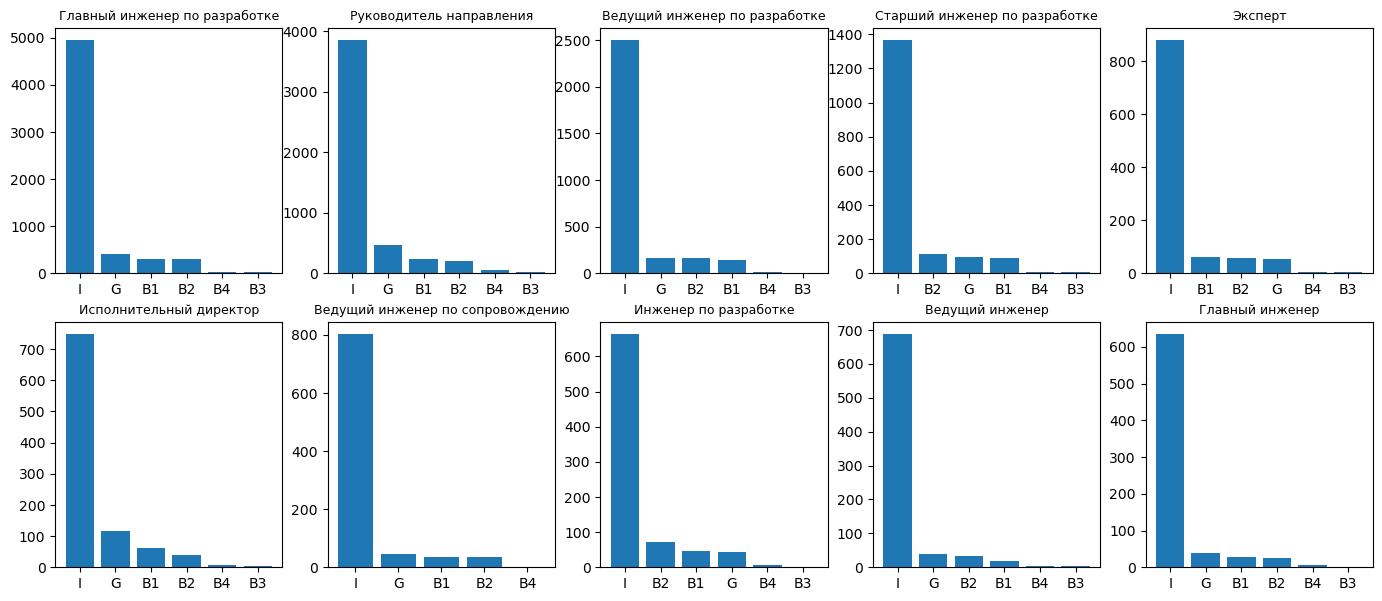

Блок Риски


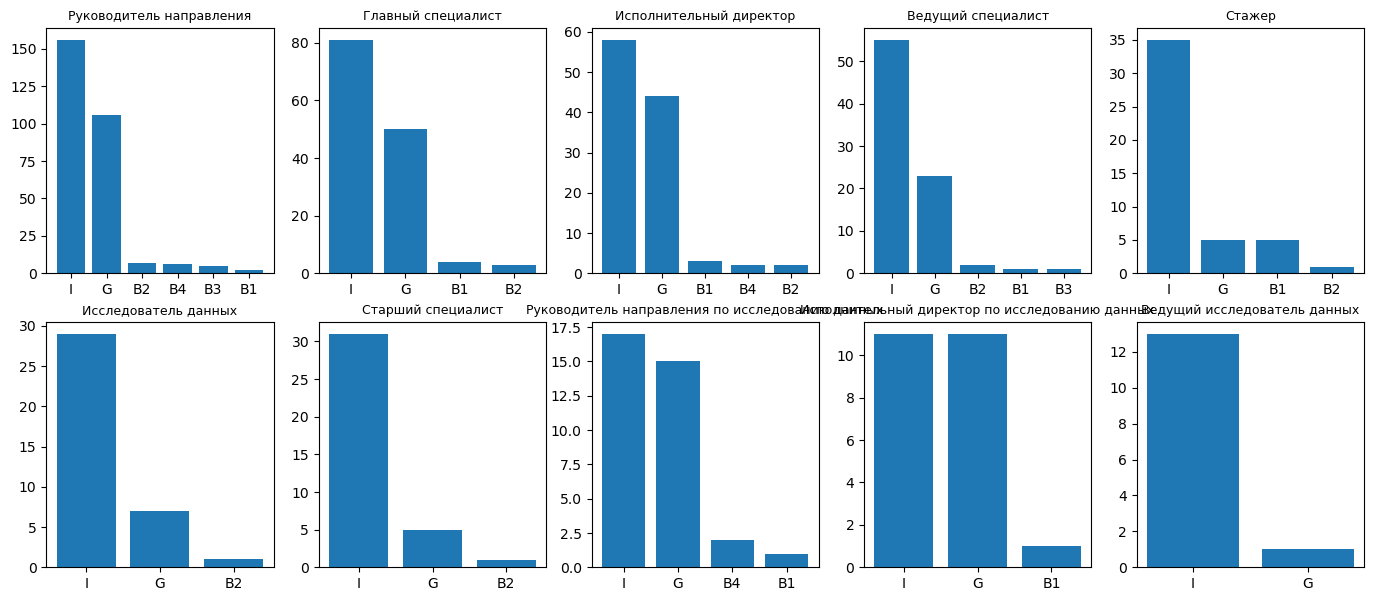

Другие подразделения


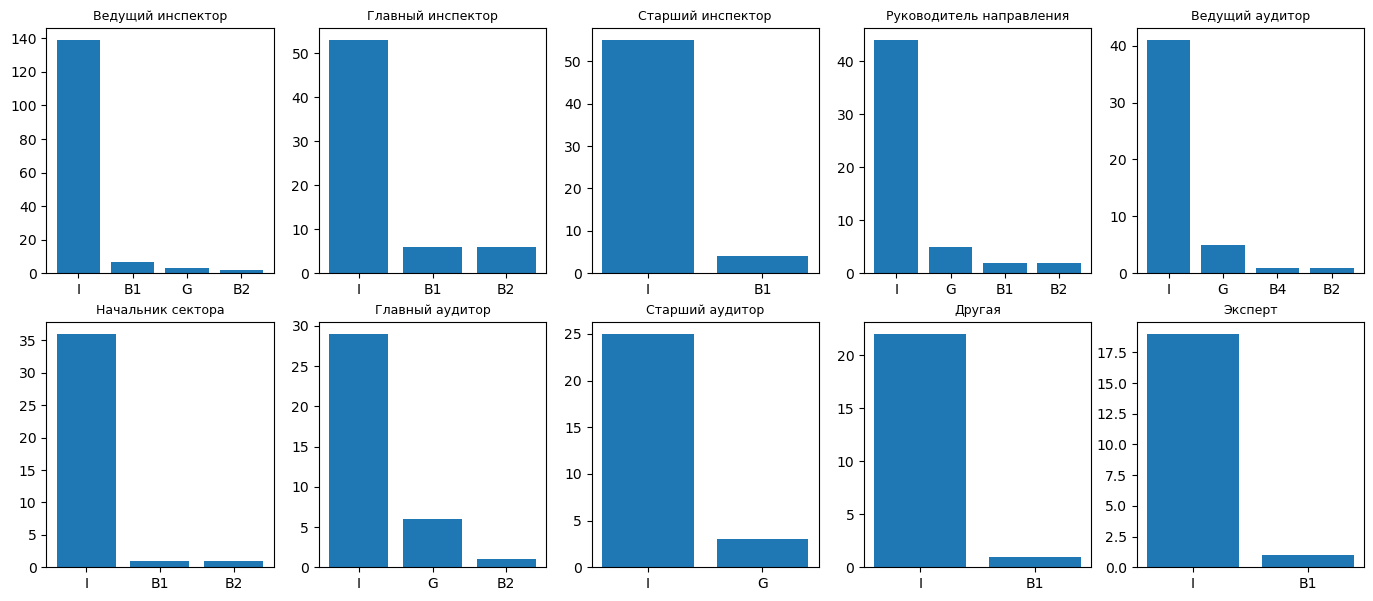

Блок HR


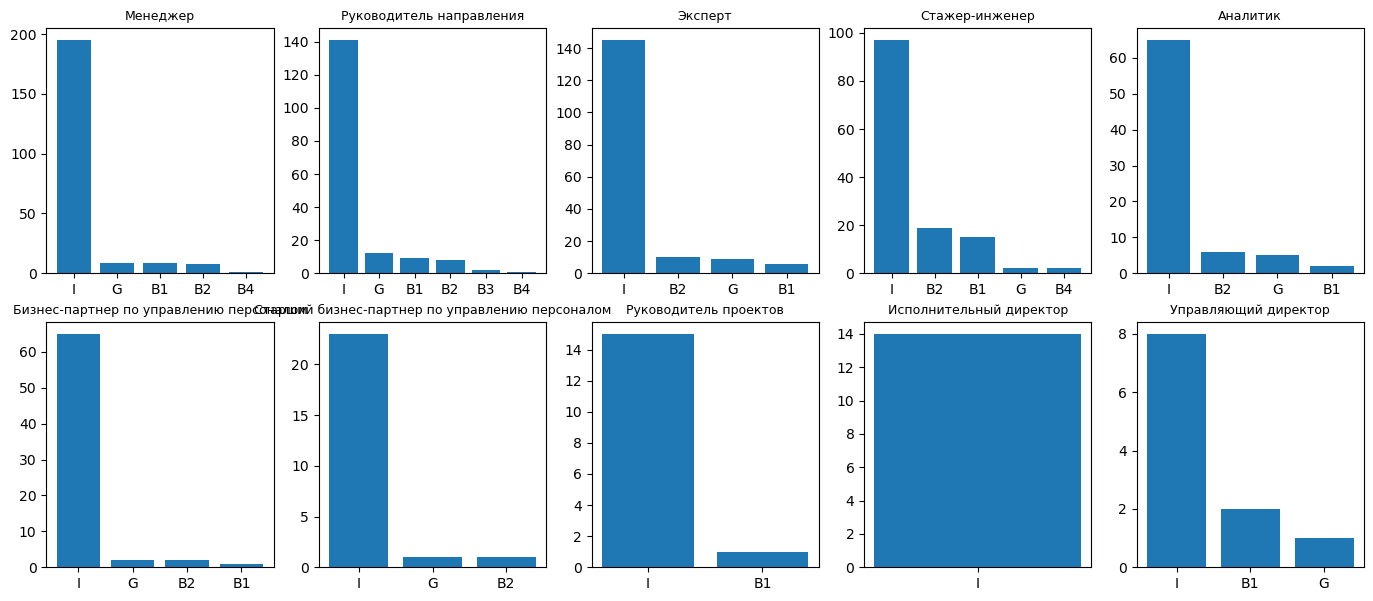

Блок Корпоративно-инвестиционный


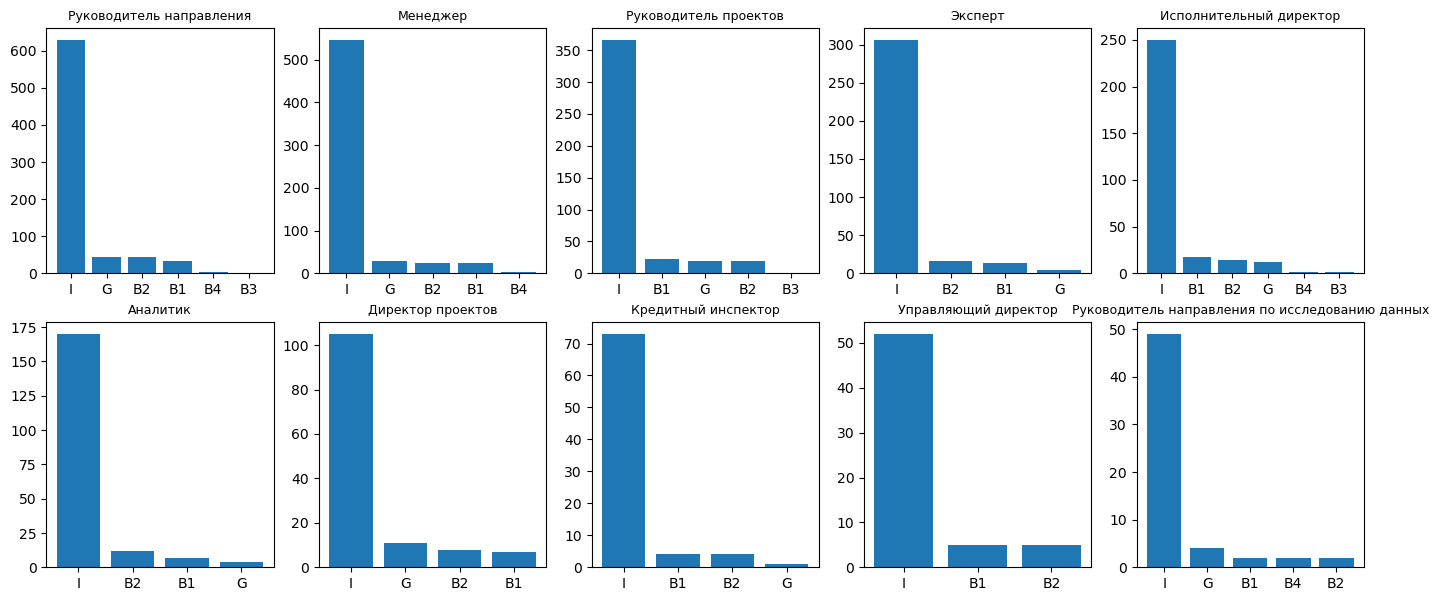

Блок Сервисы


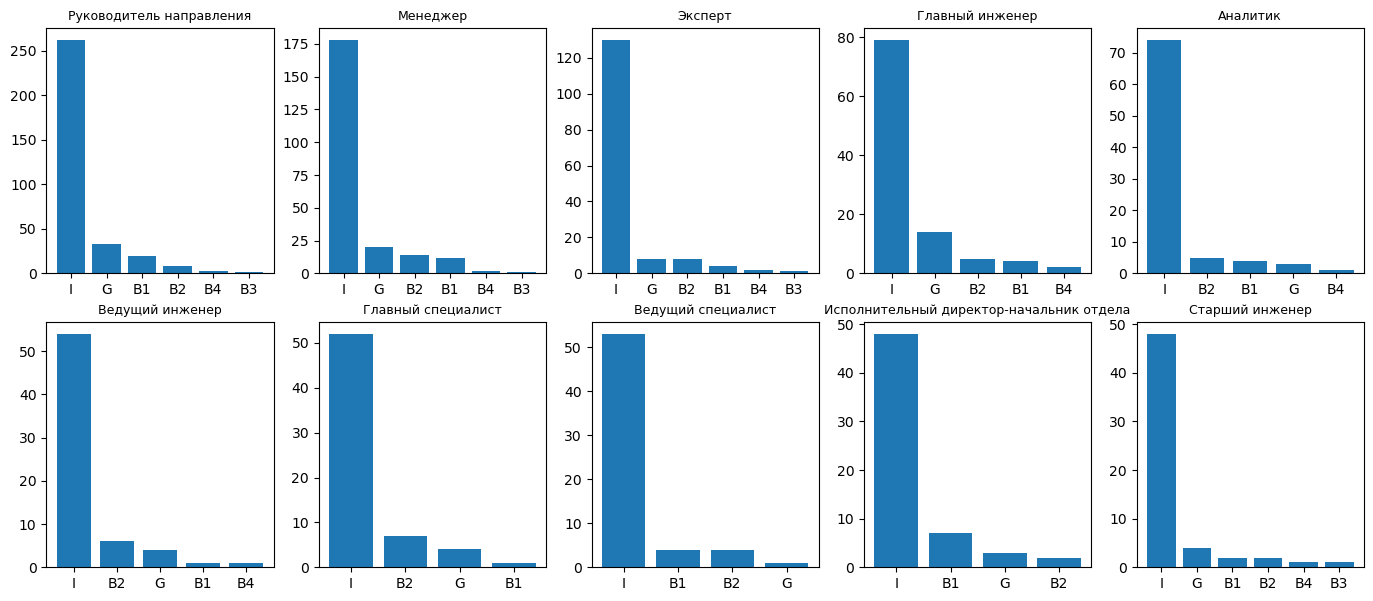

Блок GR,


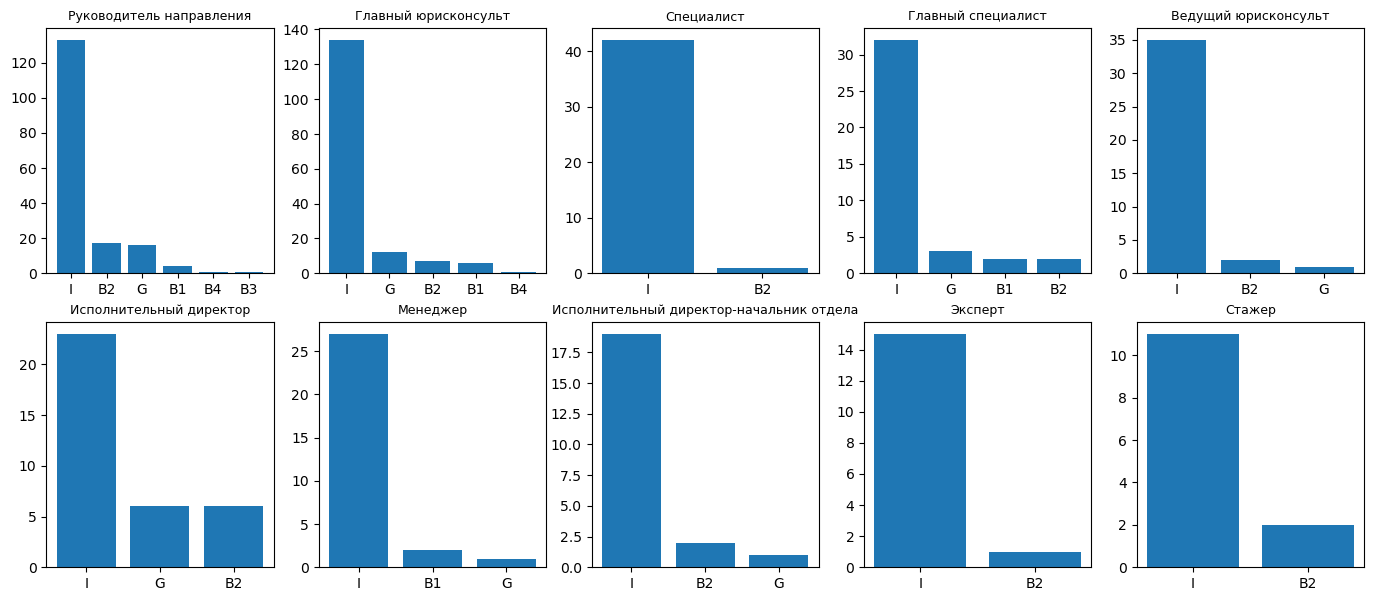

Блок Финансы


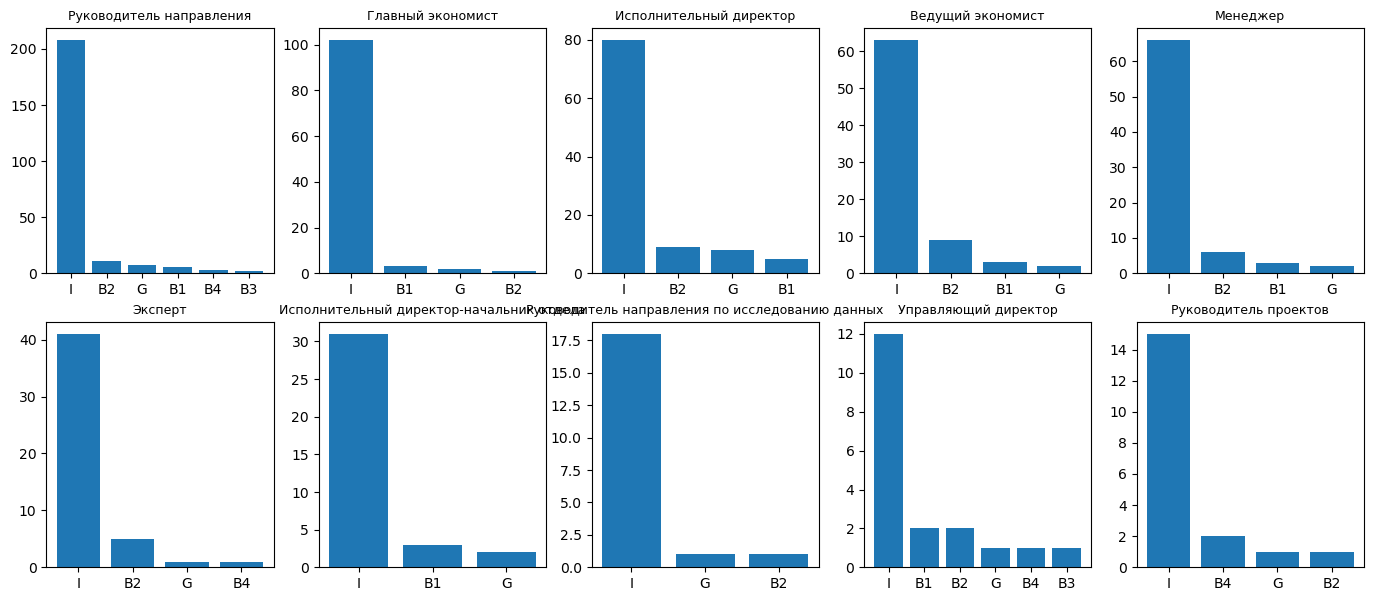

Блок Розничный


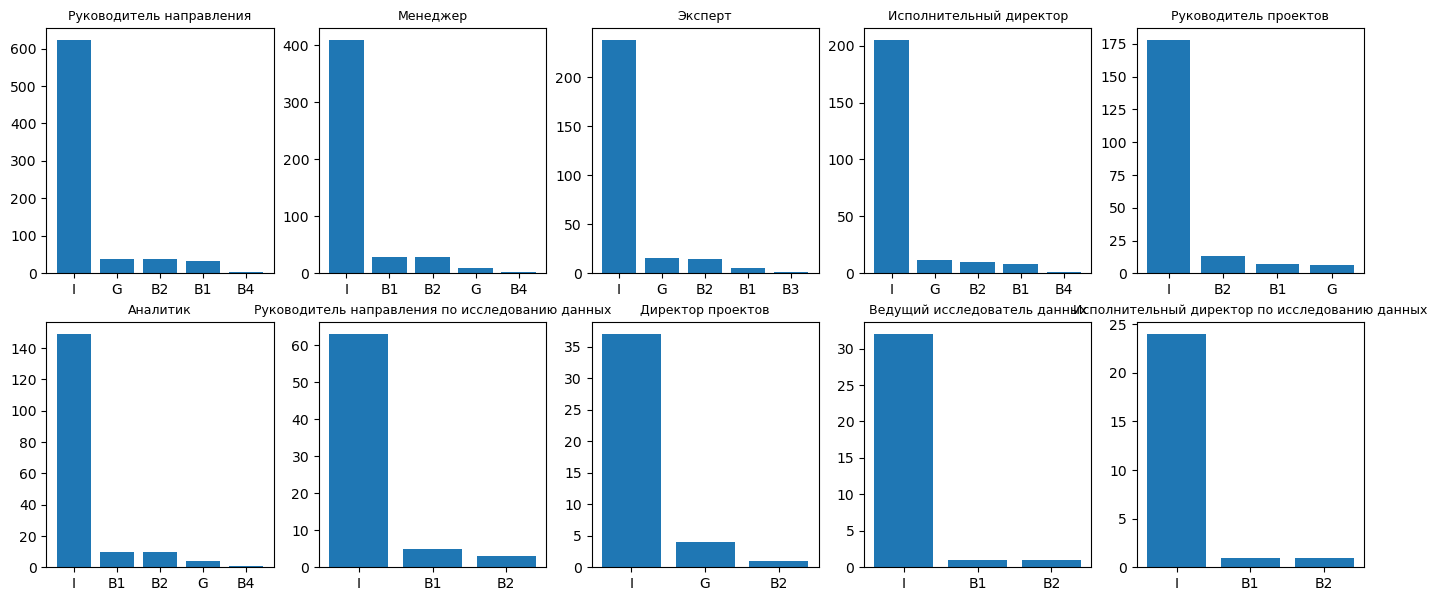

Подразделения вне


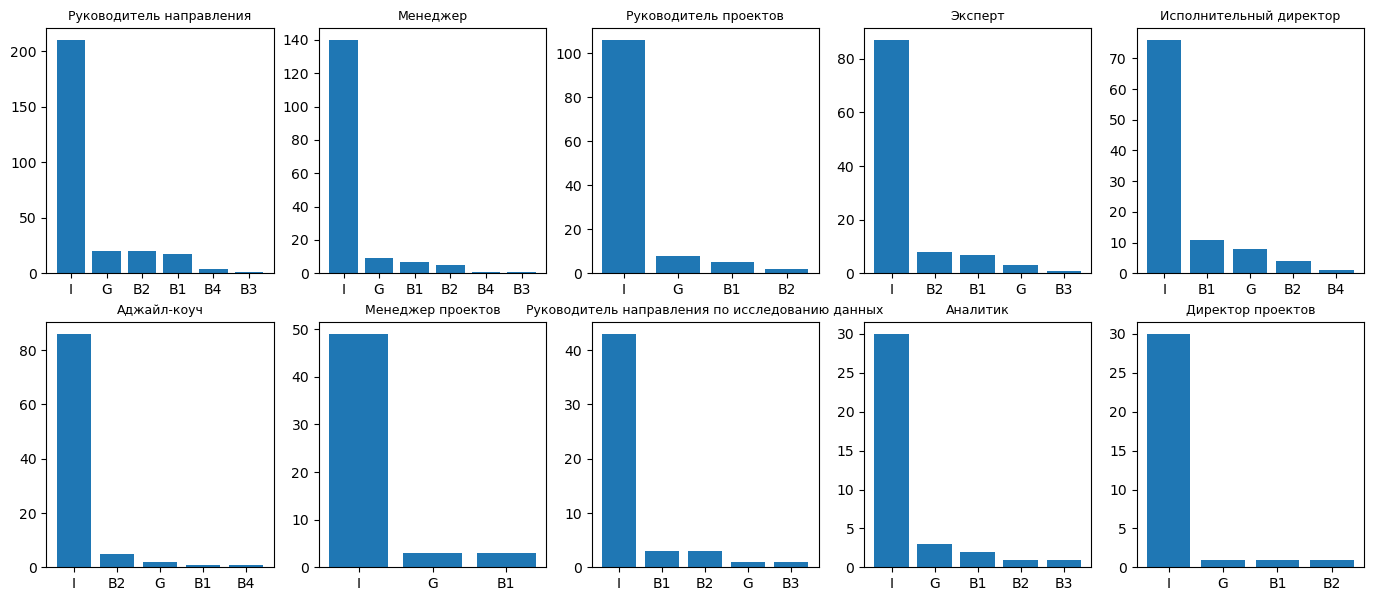

Блок Сеть


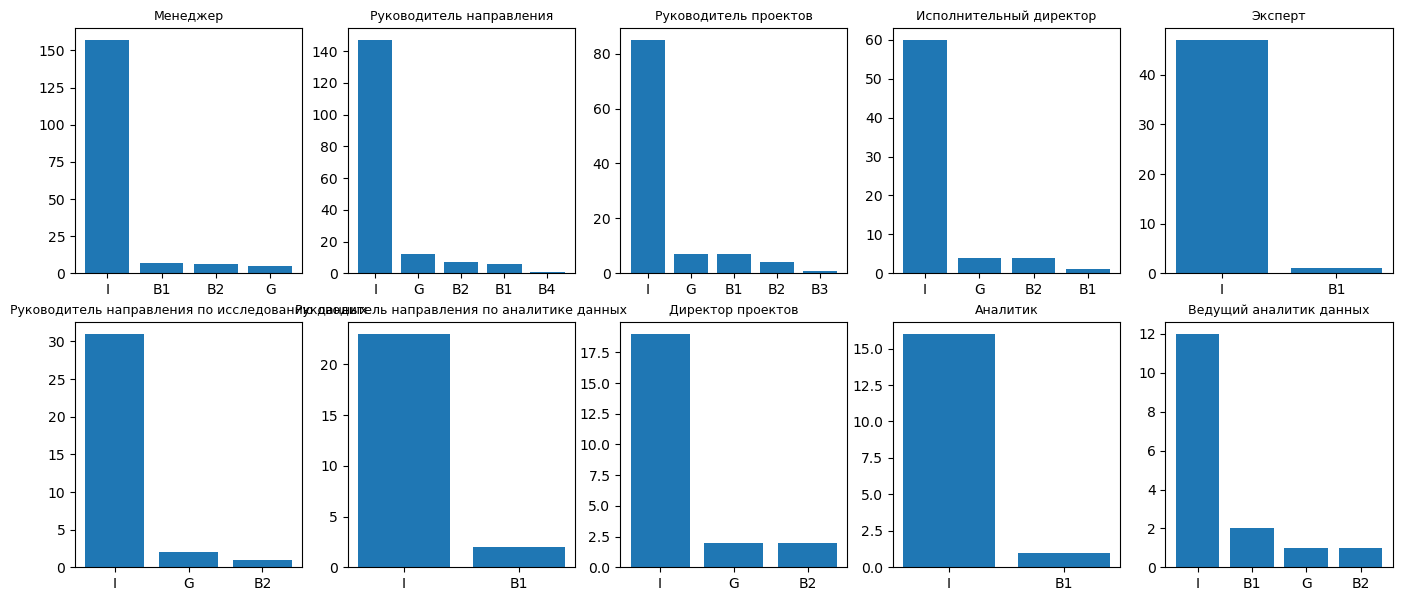

Блок Управление


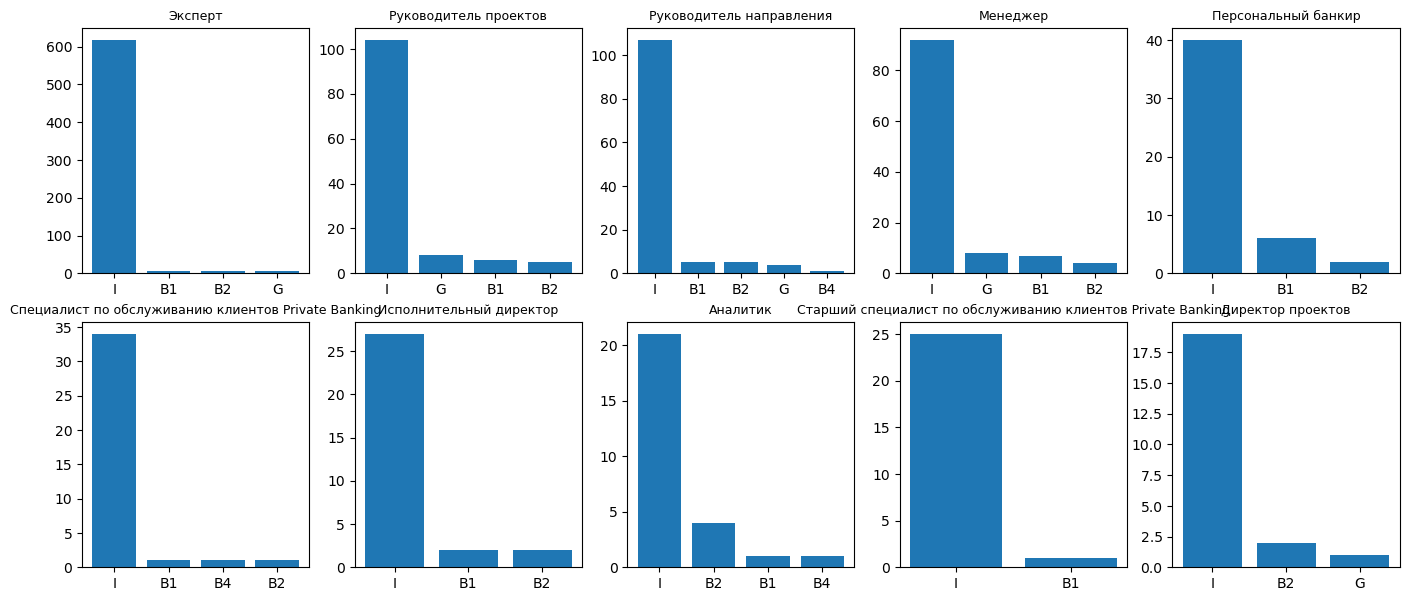

Блок Стратегия


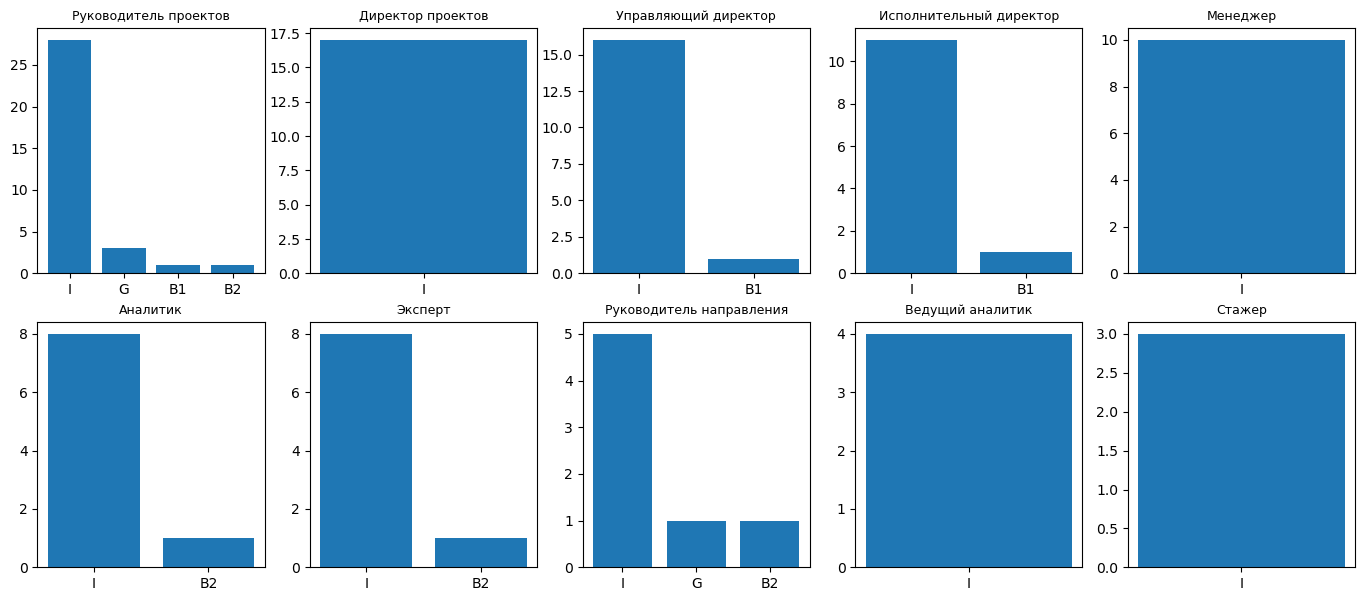

Блок Sberbank


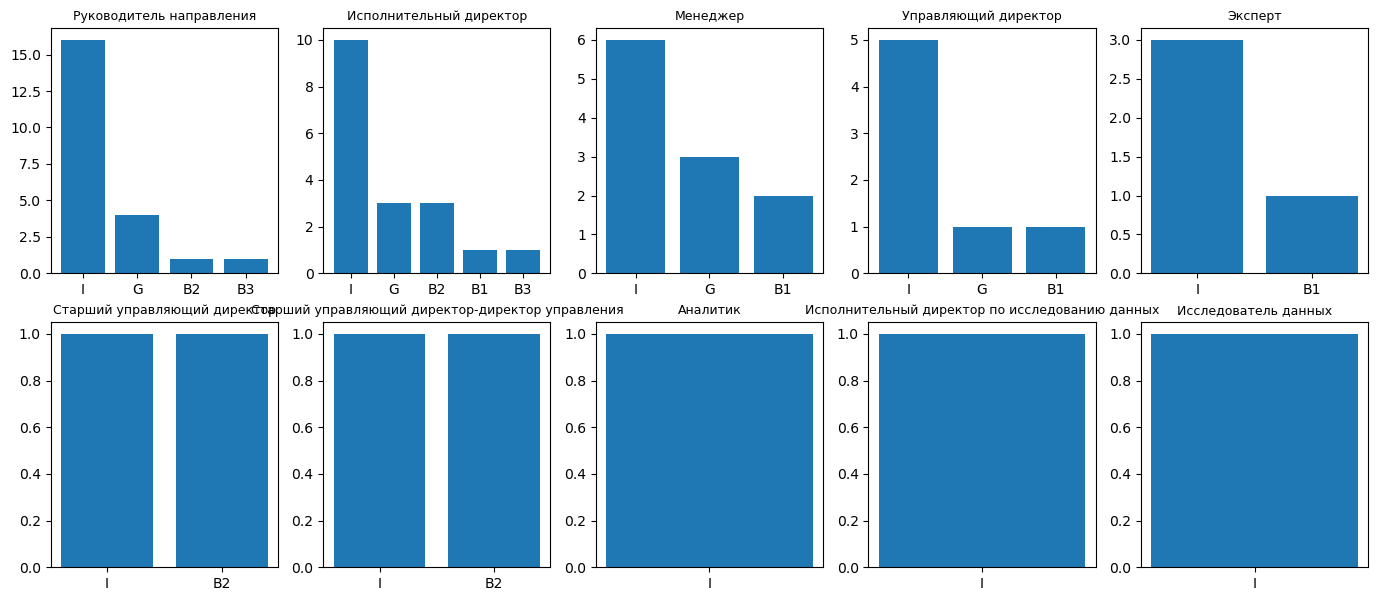

In [43]:
for department in table['Подразделение_3'].unique():
    department_stat(department)

# Подсчет без (0, 0, 0)

Выделение исходов без (0, 0, 0)

In [44]:
new_codes = [(0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Рассчет описания исходов по новому списку

In [45]:
new_possible_ends = {code: check_end(code) for code in new_codes}

Общее распределение исходов без учета (0, 0, 0)

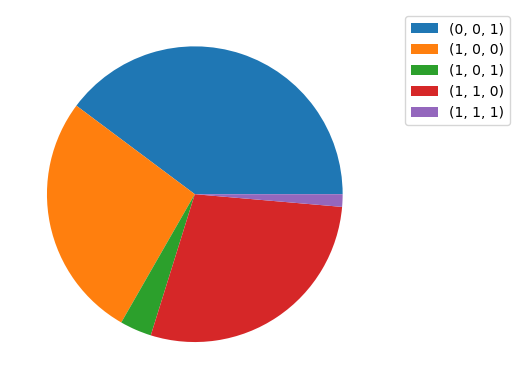

In [46]:
plt.pie([end.table_len for end in new_possible_ends.values()])

plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Распределение исходов по топ 10 по популярности должностям без (0, 0, 0)

Руководитель направления


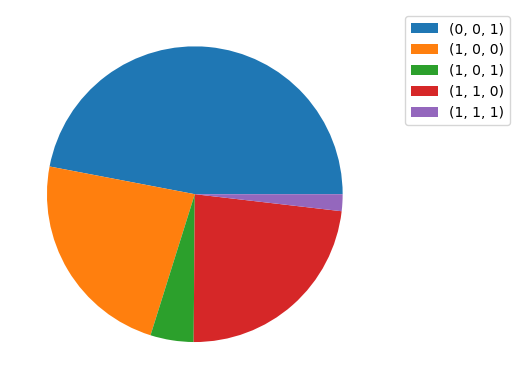

Главный инженер по разработке


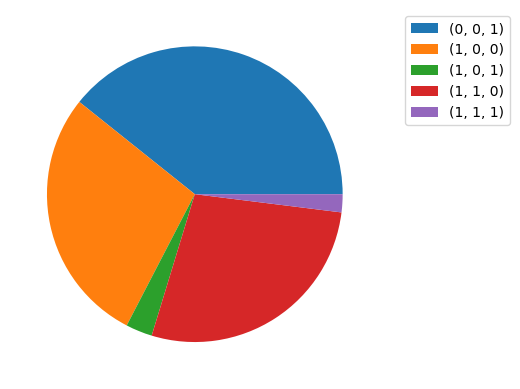

Ведущий инженер по разработке


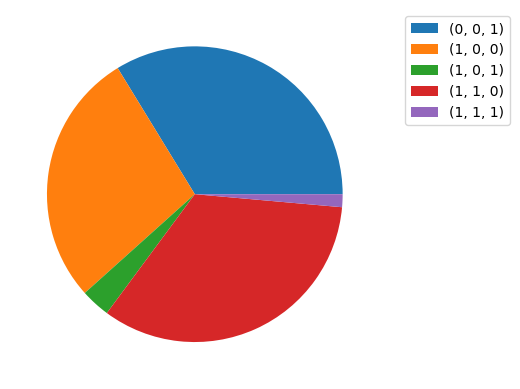

Эксперт


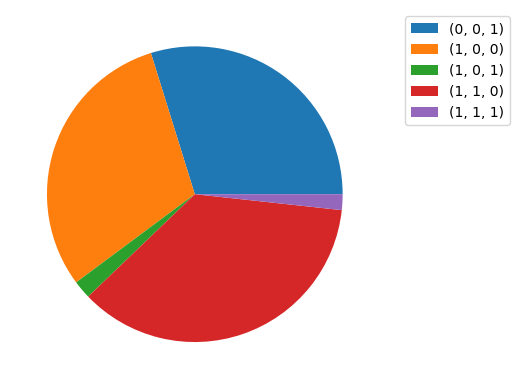

Менеджер


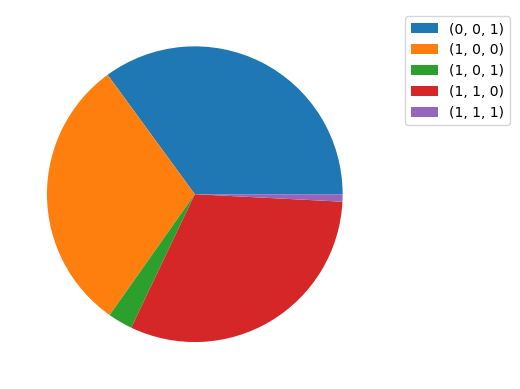

Исполнительный директор


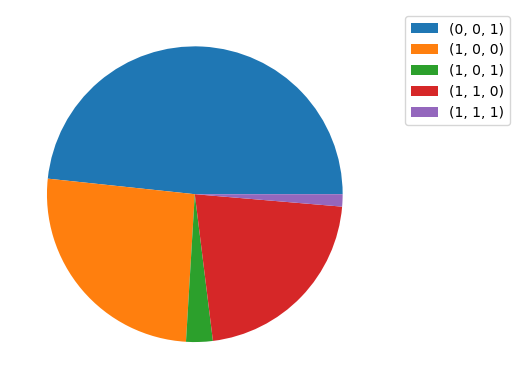

Старший инженер по разработке


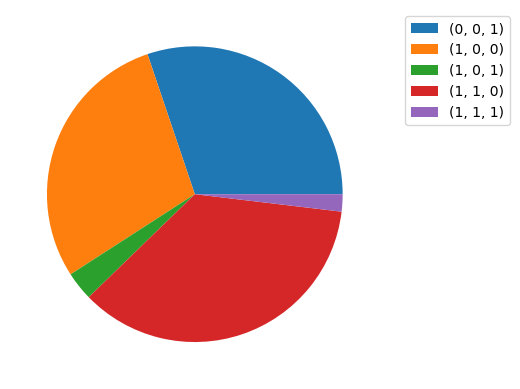

Руководитель проектов


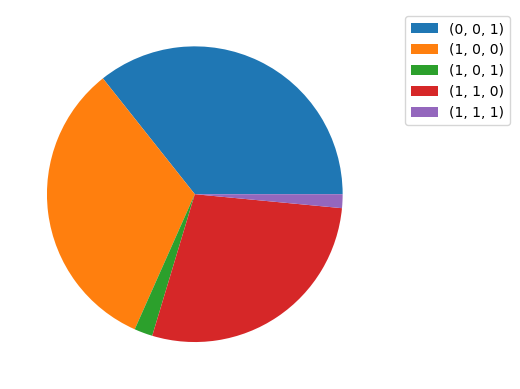

Аналитик


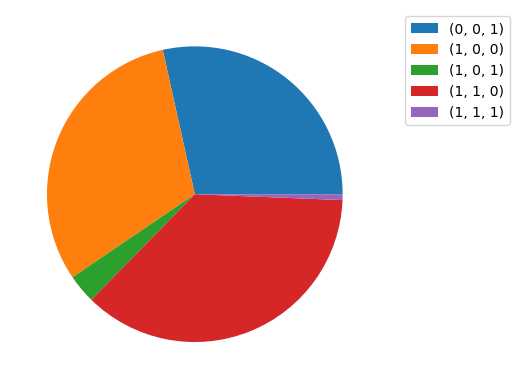

Ведущий инженер по сопровождению


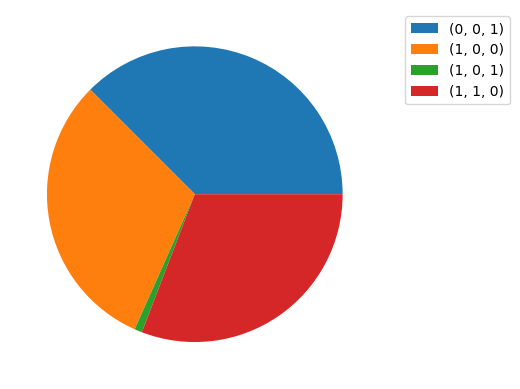

In [47]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Распределение исходов по блокам без (0, 0, 0)

Блок Технологии


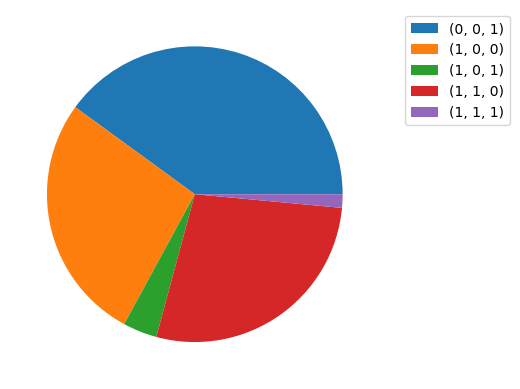

Блок Корпоративно-инвестиционный


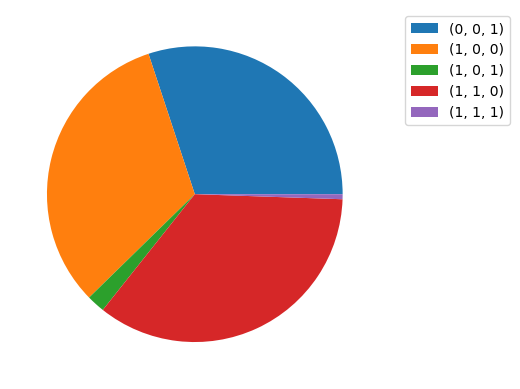

Блок Розничный


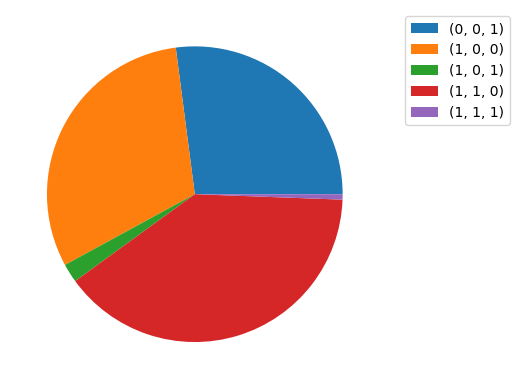

Блок Сервисы


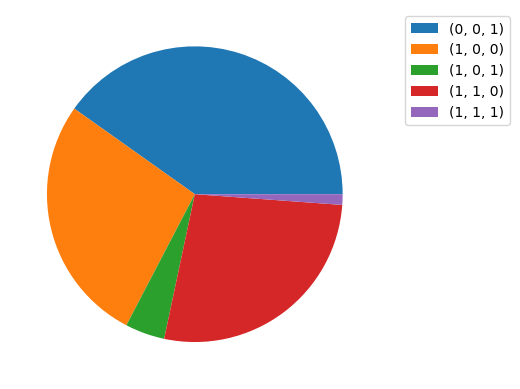

Подразделения вне


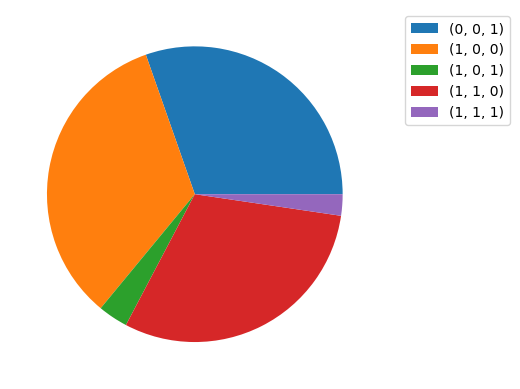

Блок Управление


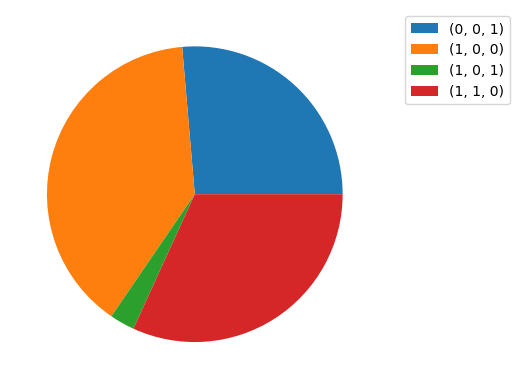

Блок HR


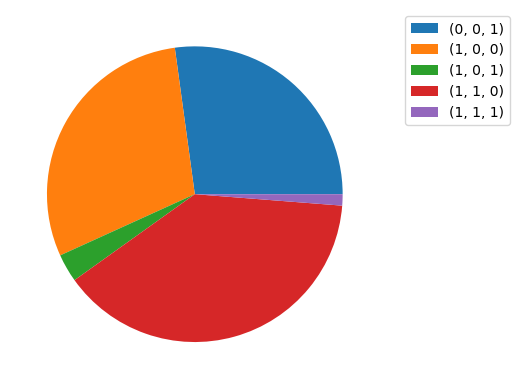

Блок Риски


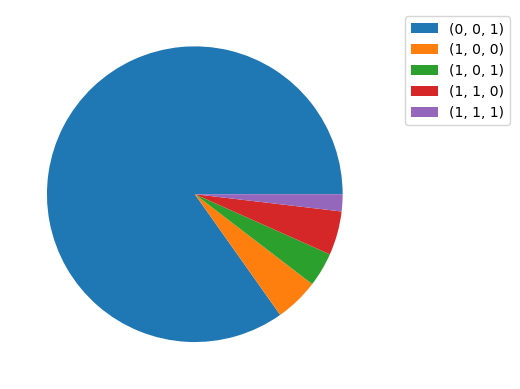

Блок Финансы


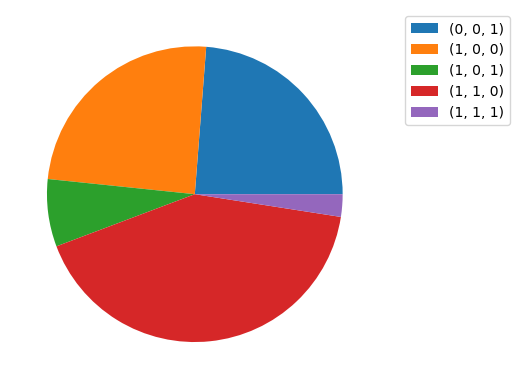

Блок Сеть


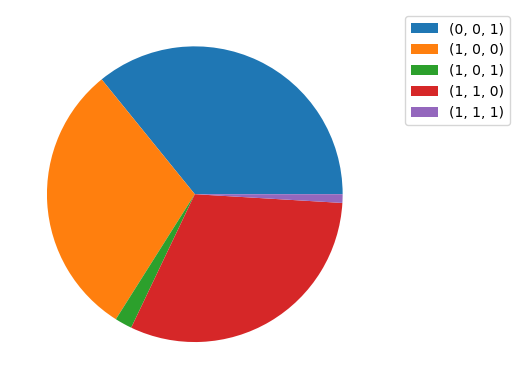

In [48]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

# Подсчет вероятности наступления исхода

Подготовка таблицы

In [49]:
temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
43074,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"
43077,Аналитик,Подразделения вне,"(1, 0, 0)"
43078,Эксперт,Блок Стратегия,"(0, 0, 0)"
43079,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [50]:
temp_table['Исход'] = temp_table['Исход'].map(lambda cell: str(cell))

Функция для оценки вероятности наступления исхода

In [51]:
def get_probability_w(cur_end: tuple) -> dict:
    print(cur_end)
    cur_table = temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Оценка для топ-10 по популярности должностей

In [52]:
for end in possible_ends:
    cur_top = get_probability_w(end)
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")

(0, 0, 0)
Вероятность для Руководитель направления - 0.80
Вероятность для Главный инженер по разработке - 0.82
Вероятность для Эксперт - 0.88
Вероятность для Ведущий инженер по разработке - 0.83
Вероятность для Менеджер - 0.85
Вероятность для Исполнительный директор - 0.78
Вероятность для Старший инженер по разработке - 0.81
Вероятность для Руководитель проектов - 0.84
Вероятность для Аналитик - 0.85
Вероятность для Ведущий инженер по сопровождению - 0.87
(0, 0, 1)
Вероятность для Руководитель направления - 0.09
Вероятность для Главный инженер по разработке - 0.07
Вероятность для Исполнительный директор - 0.11
Вероятность для Ведущий инженер по разработке - 0.06
Вероятность для Менеджер - 0.05
Вероятность для Эксперт - 0.04
Вероятность для Старший инженер по разработке - 0.06
Вероятность для Руководитель проектов - 0.06
Вероятность для Аналитик - 0.04
Вероятность для Ведущий инженер по сопровождению - 0.05
(1, 0, 0)
Вероятность для Руководитель направления - 0.05
Вероятность для Главны

In [53]:
def get_probability_w_full(cur_end: tuple) -> dict:
    print('\n')
    print('\n', cur_end, '\n', sep='')
    cur_table = full_temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Полная оценка для каждой должности

In [54]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_top = {key: float(val) for key, val in cur_top.items()}
    cur_top = dict(sorted(cur_top.items(), key=lambda item: item[1], reverse=True))
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values()))}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]}")
    except StatisticsError:
        pass




(0, 0, 0)


Средний показатель - 1.0

Вероятность для Категорийный менеджер - 1.0
Вероятность для Разработчик алгоритма - 1.0
Вероятность для Охранник - 1.0
Вероятность для Категорийный директор - 1.0
Вероятность для Экономист - 1.0
Вероятность для Инженер-разработчик - 1.0
Вероятность для Помощник старшего вице-президента - 1.0
Вероятность для Инспектор - 1.0
Вероятность для Начальник смены-старший охранник - 1.0
Вероятность для Администратор - 1.0
Вероятность для Инженер-механик - 1.0
Вероятность для Инженер-электрик - 1.0
Вероятность для Старший сейлз - 1.0
Вероятность для Старший инженер-электрик - 1.0
Вероятность для Уборщик - 1.0
Вероятность для Начальник управления - 1.0
Вероятность для Помощник заместителя Председателя Правления - 1.0
Вероятность для Руководитель проектов по развитию бизнеса - 1.0
Вероятность для Главный трейдер - 1.0
Вероятность для Ведущий специалист по продажам - 1.0
Вероятность для Техник-электрик - 1.0
Вероятность для Портфельный управляющий - 1.0
Вероя

Оценка наиболее уязвимых к фишингу должностей (от 5 и более человек в компании)

In [55]:
def check_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    cur_workers_col = {key: val for key, val in cur_workers_col.items() if val >= 5}
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)[:10]
        

In [56]:
bad_codes = [(1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)]

In [57]:
for code in bad_codes:
    print(code)
    cur_top = check_worker(code)
    for worker in cur_top:
        print(f"{worker[0]}: {worker[1]:0.2f}")
    print("\n")

(1, 0, 0)
Персональный банкир: 0.12
Стажер-инженер: 0.11
Главный инспектор: 0.09
Главный эксперт: 0.08
Управляющий директор: 0.07
Ведущий эксперт: 0.07
Ведущий дизайнер: 0.07
Стажер: 0.07
Исполнительный директор-начальник отдела: 0.07
Исполнительный директор по исследованию данных: 0.06


(1, 1, 0)
Стажер-инженер: 0.14
Старший дизайнер: 0.13
Ведущий экономист: 0.11
Главный эксперт по технологиям: 0.10
Главный инспектор: 0.09
Инженер по разработке: 0.09
Аналитик данных: 0.08
Стажер: 0.07
Ведущий дизайнер: 0.07
Старший инженер по разработке: 0.07


(1, 0, 1)
Управляющий директор-начальник управления: 0.03
Старший эксперт по технологиям: 0.01
Руководитель направления: 0.01
Главный инженер: 0.01
Инженер по разработке: 0.01
Ведущий инженер: 0.01
Исполнительный директор: 0.01
Старший инженер по разработке: 0.01
Ведущий инженер по разработке: 0.01
Главный инженер по разработке: 0.01


(1, 1, 1)
Руководитель направления: 0.00
Старший инженер по разработке: 0.00
Главный инженер по разработке: 0

Рассмотрение хорошего исхода

In [58]:
print("(0, 0, 1)")
cur_top = check_worker((0, 0, 1))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 1)
Управляющий директор-начальник центра: 0.27
Главный специалист: 0.23
Исполнительный директор-начальник управления: 0.17
Главный аудитор: 0.17
Исполнительный директор по исследованию данных: 0.15
Ведущий специалист: 0.13
Главный аналитик: 0.12
Исполнительный директор-начальник отдела: 0.11
Старший аналитик: 0.11
Ведущий аналитик: 0.11


Рассмотрение варианта с игнорированием

In [59]:
print("(0, 0, 0)")
cur_top = check_worker((0, 0, 0))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 0)
Категорийный менеджер: 1.00
Разработчик алгоритма: 1.00
Охранник: 1.00
Категорийный директор: 1.00
Экономист: 1.00
Инженер-разработчик: 1.00
Помощник старшего вице-президента: 1.00
Инспектор: 1.00
Начальник смены-старший охранник: 1.00
Администратор: 1.00


Оценка наиболее уязвимых к фишингу блоков

In [60]:
def check_department(cur_end: tuple) -> list:
    gen_dep_col = table.value_counts('Подразделение_3')
    cur_dep_col = dict(possible_ends[cur_end].department_rate)
    dep_col_diff = defaultdict(float)
    for department in cur_dep_col:
        try:
            dep_col_diff[department] = cur_dep_col[department]/gen_dep_col[department]
        except KeyError:
            pass
        
    return sorted(dep_col_diff.items(), key=lambda item: item[1], reverse=True)

In [61]:
for code in bad_codes:
    print(code)
    cur_top = check_department(code)
    for department in cur_top:
        print(f"{department[0]}: {department[1]:0.2f}")
    print("\n")

(1, 0, 0)
Блок Sberbank: 0.07
Подразделения вне: 0.06
Блок HR: 0.05
Блок Сервисы: 0.05
Блок Технологии: 0.05
Другие подразделения: 0.05
Блок Корпоративно-инвестиционный: 0.05
Блок Розничный: 0.04
Блок Сеть: 0.04
Блок Управление: 0.03
Блок Финансы: 0.03
Блок GR,: 0.03
Блок Стратегия: 0.02
Блок Риски: 0.02


(1, 1, 0)
Блок Sberbank: 0.08
Блок GR,: 0.07
Блок HR: 0.06
Блок Финансы: 0.06
Блок Розничный: 0.06
Подразделения вне: 0.05
Блок Корпоративно-инвестиционный: 0.05
Блок Технологии: 0.05
Блок Сервисы: 0.05
Блок Сеть: 0.04
Другие подразделения: 0.03
Блок Стратегия: 0.03
Блок Управление: 0.03
Блок Риски: 0.02


(1, 0, 1)
Блок Риски: 0.02
Блок Финансы: 0.01
Блок Сервисы: 0.01
Блок Технологии: 0.01
Подразделения вне: 0.01
Блок HR: 0.01
Блок GR,: 0.00
Блок Розничный: 0.00
Блок Корпоративно-инвестиционный: 0.00
Другие подразделения: 0.00
Блок Сеть: 0.00
Блок Управление: 0.00


(1, 1, 1)
Блок Sberbank: 0.03
Блок Риски: 0.01
Подразделения вне: 0.00
Блок Финансы: 0.00
Блок Технологии: 0.00
Блок 

Рассмотрение хорошего исхода

In [62]:
print("(0, 0, 1)")
cur_top = check_department((0, 0, 1))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 1)
Блок Риски: 0.35
Блок Sberbank: 0.15
Блок Сервисы: 0.07
Блок Технологии: 0.07
Блок GR,: 0.07
Подразделения вне: 0.05
Блок Сеть: 0.05
Блок HR: 0.04
Блок Корпоративно-инвестиционный: 0.04
Другие подразделения: 0.04
Блок Розничный: 0.04
Блок Финансы: 0.03
Блок Стратегия: 0.03
Блок Управление: 0.02


Рассмотрение варианта с игнорированием

In [63]:
print("(0, 0, 0)")
cur_top = check_department((0, 0, 0))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 0)
Блок Стратегия: 0.92
Блок Управление: 0.91
Другие подразделения: 0.88
Блок Финансы: 0.86
Блок Сеть: 0.86
Блок Розничный: 0.86
Блок Корпоративно-инвестиционный: 0.86
Подразделения вне: 0.83
Блок HR: 0.83
Блок GR,: 0.83
Блок Сервисы: 0.82
Блок Технологии: 0.82
Блок Sberbank: 0.67
Блок Риски: 0.59


Распределим сотрудников по группам. 1 группа - очень подвержены (x>0.75), 2 группа - скорее да, чем нет (0.5<x<0.75), 3 группа - скорее нет, чем да (0.25<x<0.5), 4 группа - наименее подвержены (x<0.25)

h - 1 группа
hm - 2 группа
ml - 3 группа
l - 4 группа

In [64]:
change_group = {'h': 'hm', 'hm': 'ml', 'ml': 'l'}
group_name = {'hm': 'Скорее да, чем нет', 'ml': 'Скорее нет, чем да','l': 'Наименее подвержены'}

In [65]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_group = 'h'
    next_group_chk = 0.75
    print('Наиболее подвержены\n')
    for row in cur_top.items():
        if float(row[1]) < next_group_chk:
            cur_group = change_group[cur_group]
            next_group_chk -= 0.25
            print('\n')
            print('\n', group_name[cur_group], '\n', sep='')
        print(row[0], end='; ')




(0, 0, 0)

Наиболее подвержены

Руководитель направления; Главный инженер по разработке; Эксперт; Ведущий инженер по разработке; Менеджер; Исполнительный директор; Старший инженер по разработке; Руководитель проектов; Аналитик; Ведущий инженер по сопровождению; Ведущий инженер; Главный инженер; Инженер по разработке; Старший эксперт по технологиям; Главный инженер по сопровождению; Старший инженер по сопровождению; Старший инженер; Ведущий эксперт по технологиям; Директор проектов; Руководитель направления по исследованию данных; Стажер; Ведущий аналитик; Исполнительный директор-начальник отдела; Управляющий директор; Главный аналитик; Ведущий эксперт; 


Скорее да, чем нет

Главный специалист; Старший аналитик; Инженер по сопровождению; Ведущий специалист; Ведущий инспектор; Ведущий исследователь данных; Управляющий директор-начальник управления; Главный эксперт; Инженер; Главный юрисконсульт; Исследователь данных; Старший эксперт; Руководитель направления по аналитике данных; Глав

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; 


Скорее нет, чем да

Главный инженер по разработке; 


Наименее подвержены

Ведущий инженер по разработке; Эксперт; Менеджер; Старший инженер по разработке; Исполнительный директор; Инженер по разработке; Аналитик; Руководитель проектов; Ведущий инженер; Ведущий инженер по сопровождению; Главный инженер; Старший эксперт по технологиям; Старший инженер по сопровождению; Стажер; Директор проектов; Стажер-инженер; Управляющий директор; Ведущий аналитик; Старший инженер; Главный аналитик; Руководитель направления по исследованию данных; Главный специалист; Главный инженер по сопровождению; Старший аналитик; Главный эксперт; Ведущий эксперт по технологиям; Исполнительный директор-начальник отдела; Ведущий эксперт; Ведущий экономист; Управляющий директор-начальник управления; Главный эксперт по технологиям; Исследователь данных; Главный юрисконсульт; Аналитик данных; Ведущий специалист; Инженер; Главный инспектор; Старши

Разделение на управляющий и рядовой состав

In [66]:
key_words = {'руководитель', 'директор', 'ведущий', 'главный', 'президент', 'начальник', 'советник'}
lead_workers = []

In [67]:
for worker in list(table['Должность'].unique()):
    cl_worker = "".join([ltr.lower() if ltr not in ['-', '.', ','] else ' ' for ltr in worker])
    if set(cl_worker.split()).intersection(key_words):
        lead_workers.append(worker)

In [68]:
len(lead_workers)

233

In [69]:
lead_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(lead_workers)]

In [70]:
lead_workers_df = pd.DataFrame(lead_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [71]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(lead_workers_df['Вероятность'])))

In [72]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [73]:
lead_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.817
1,"(0, 0, 1)",0.079
2,"(1, 1, 0)",0.047
3,"(1, 0, 0)",0.047
4,"(1, 0, 1)",0.007
5,"(1, 1, 1)",0.003


In [74]:
simple_workers = set(table['Должность'].unique()).difference(set(lead_workers))

In [75]:
len(simple_workers)

144

In [76]:
simple_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(simple_workers)]

In [77]:
simple_workers_df = pd.DataFrame(simple_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [78]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(simple_workers_df['Вероятность'])))

In [79]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [80]:
simple_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.854
1,"(1, 1, 0)",0.051
2,"(0, 0, 1)",0.045
3,"(1, 0, 0)",0.044
4,"(1, 0, 1)",0.004
5,"(1, 1, 1)",0.002


Подсчет вероятностей каждого исхода для управляющего и рядового состава

In [81]:
def check_lead_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in lead_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для руководящего состава

In [82]:
for end in possible_ends:
    cur_top = check_lead_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 1.00

Вероятность для Категорийный директор - 1.00
Вероятность для Начальник смены-старший охранник - 1.00
Вероятность для Начальник управления - 1.00
Вероятность для Руководитель проектов по развитию бизнеса - 1.00
Вероятность для Главный трейдер - 1.00
Вероятность для Ведущий специалист по продажам - 1.00
Вероятность для Ведущий администратор проектов - 1.00
Вероятность для Ведущий архитектор - 1.00
Вероятность для Территориальный директор - 1.00
Вероятность для Директор по финансовым институтам - 1.00
Вероятность для Управляющий директор-директор лаборатории - 1.00
Вероятность для Старший управляющий директор-директор центра - 1.00
Вероятность для Исполнительный директор-старший сейлз - 1.00
Вероятность для Директор по организации продаж - 1.00
Вероятность для Ведущий специалист по операционной поддержке - 1.00
Вероятность для Ведущий инженер по энергосистемам - 1.00
Вероятность для Ведущий инженер по технике безопасности и охране труда - 1.00
Вероя


(0, 0, 1)


Средний показатель - 0.11

Вероятность для Старший управляющий директор-заместитель директора департамента - 1.00
Вероятность для Главный архитектор СКЗИ - 1.00
Вероятность для Руководитель направления по работе с РБ - 1.00
Вероятность для Исполнительный директор по защите данных - 1.00
Вероятность для Исполнительный директор-директор по банкнотным операциям - 1.00
Вероятность для Директор проектов по взаимодействию с госструктурами - 1.00
Вероятность для Главный менеджер по взаимодействию с госструктурами - 1.00
Вероятность для Исполнительный директор-заместитель начальника центра - 1.00
Вероятность для Исполнительный директор по исследованию данных-начальник центра - 0.50
Вероятность для Старший управляющий директор-начальник центра - 0.50
Вероятность для Исполнительный директор по направлению Экспертиза обработки и защиты ПДн - 0.50
Вероятность для Управляющий территориальный директор - 0.33
Вероятность для Директор проектов по защите данных - 0.33
Вероятность для Управ

In [83]:
def check_simple_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in simple_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для рядового состава

In [84]:
for end in possible_ends:
    cur_top = check_simple_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 1.00

Вероятность для Категорийный менеджер - 1.00
Вероятность для Разработчик алгоритма - 1.00
Вероятность для Охранник - 1.00
Вероятность для Экономист - 1.00
Вероятность для Инженер-разработчик - 1.00
Вероятность для Помощник старшего вице-президента - 1.00
Вероятность для Инспектор - 1.00
Вероятность для Администратор - 1.00
Вероятность для Инженер-механик - 1.00
Вероятность для Инженер-электрик - 1.00
Вероятность для Старший сейлз - 1.00
Вероятность для Старший инженер-электрик - 1.00
Вероятность для Уборщик - 1.00
Вероятность для Помощник заместителя Председателя Правления - 1.00
Вероятность для Техник-электрик - 1.00
Вероятность для Портфельный управляющий - 1.00
Вероятность для Специалист по операционной поддержке - 1.00
Вероятность для Отраслевой кредитный менеджер - 1.00
Вероятность для Медиатор - 1.00
Вероятность для Старший редактор - 1.00
Вероятность для Менеджер по работе с ключевыми партнерами - 1.00
Вероятность для Младший трейдер - 1.0


(1, 0, 1)


Средний показатель - 0.01

Вероятность для Специалист по обслуживанию клиентов Private Banking - 0.03
Вероятность для Стажер-инженер - 0.01
Вероятность для Старший эксперт по технологиям - 0.01
Вероятность для Инженер по сопровождению - 0.01
Вероятность для Аджайл-коуч - 0.01
Вероятность для Инженер по разработке - 0.01
Вероятность для Инженер - 0.01
Вероятность для Старший инженер по разработке - 0.01
Вероятность для Аналитик - 0.00
Вероятность для Старший аналитик - 0.00
Вероятность для Старший инженер - 0.00
Вероятность для Менеджер - 0.00
Вероятность для Эксперт - 0.00
Вероятность для Старший инженер по сопровождению - 0.00

(1, 1, 0)


Средний показатель - 0.05

Вероятность для Менеджер по работе с ключевыми клиентами - 0.25
Вероятность для Младший аналитик данных - 0.20
Вероятность для Младший клиентский менеджер - 0.17
Вероятность для Младший сейлз - 0.17
Вероятность для Старший менеджер по крупнейшим клиентам - 0.15
Вероятность для Стажер-инженер - 0.14
Вероятность

Построение вероятностного распределения для всех исходов

По оси X - всевозможные исходы при взаимодействии с письмом. (0, 0, 0); (0, 0, 1) и тд. По оси Y - вероятность для каждого исхода.

In [85]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
43076,Инженер по разработке,Блок Технологии,"(0, 0, 0)"
43077,Аналитик,Подразделения вне,"(1, 0, 0)"
43078,Эксперт,Блок Стратегия,"(0, 0, 0)"
43079,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [86]:
prob_df = pd.DataFrame(full_temp_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [87]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",35711
1,"(0, 0, 1)",2932
2,"(1, 1, 0)",2096
3,"(1, 0, 0)",1985
4,"(1, 0, 1)",256
5,"(1, 1, 1)",101


In [88]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: int(cell)/sum(list(prob_df['Вероятность'])))

In [89]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [90]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",0.829
1,"(0, 0, 1)",0.068
2,"(1, 1, 0)",0.049
3,"(1, 0, 0)",0.046
4,"(1, 0, 1)",0.006
5,"(1, 1, 1)",0.002


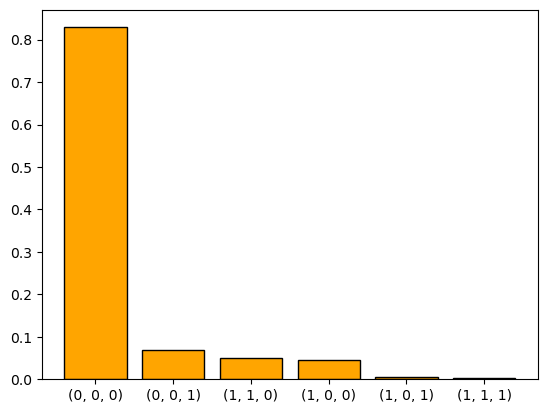

In [91]:
plt.bar(prob_df['Исход'], prob_df['Вероятность'], color = 'orange', edgecolor = 'black')

plt.show()